<a href="https://colab.research.google.com/github/kottn/colab/blob/master/autoenc_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## てすと

In [0]:
a=3

In [27]:
a

3

## MNIST データをもってくる

In [1]:

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

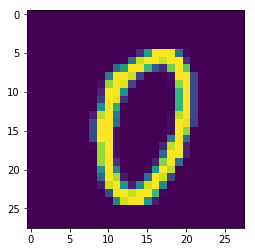

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1000])

## 前処理しとく

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
x_train = x_train / 255.
x_test = x_test / 255.

x_train.min(), x_train.max()

(0.0, 6.030862941101084e-08)

In [0]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [0]:
import copy

x_input_train = copy.deepcopy(x_train[:50000])
x_output_train = copy.deepcopy(x_train[:50000])

x_input_val = copy.deepcopy(x_train[50000:])
x_output_val = copy.deepcopy(x_train[50000:])

x_input_test = copy.deepcopy(x_test)
x_output_test = copy.deepcopy(x_test)

In [0]:

import numpy as np
import cv2

# Denoising
#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 0.5
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 0.5
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 0.5

#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 5.
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 5.
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 5.

# Inpainting
#x_input_train[:,:,:14,:] = np.random.random(size=[50000,28,14,1])
#x_input_val[:,:,:14,:] = np.random.random(size=[10000,28,14,1])
#x_input_test[:,:,:14,:] = np.random.random(size=[10000,28,14,1])

# Superresolution
x_input_train = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_train]), -1)
x_input_val = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_val]), -1)
x_input_test = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_test]), -1)

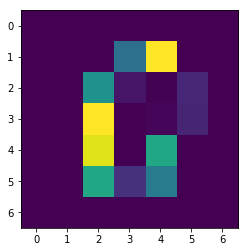

In [15]:
plt.imshow(x_input_train[1000].squeeze())

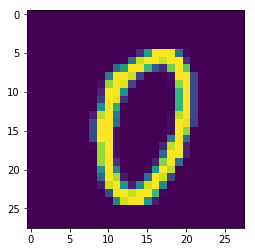

In [16]:
plt.imshow(x_output_train[1000].squeeze())

## ニューラルネットを作る

In [0]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, UpSampling2D

In [0]:
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
  
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if False:
  input_tensor = Input((28,28,1))
  
  nb_ch = 16
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)
  
  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if True:
  input_tensor = Input((7,7,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(64, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)
  
  output_tensor = Activation('sigmoid')(h)

In [0]:
from keras.models import Model

auto_encoder = Model(input_tensor, output_tensor)

In [0]:
auto_encoder.compile(loss='mse', optimizer='adam')

In [25]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 1)           0         
_________________________________________________________________
activation_6 (Activation)    (None, 7, 7, 1)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 1)           4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          160       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 16)        0         
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 16)        64        
__________

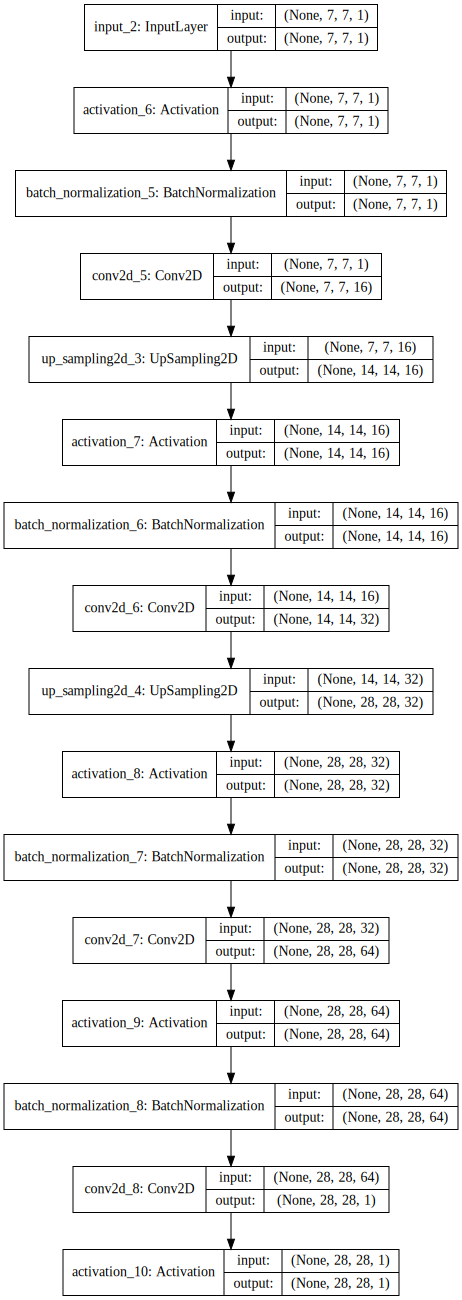

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(auto_encoder, show_shapes=True).create(prog='dot', format='svg'))

## 訓練する

In [29]:
hist = auto_encoder.fit(
    x = x_input_train,
    y = x_output_train,
    epochs = 20,
    batch_size=100,
    validation_data = (x_input_val, x_output_val),
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 365s 7ms/step - loss: 0.0078 - val_loss: 2.8067e-05
Epoch 2/20
50000/50000 [==============================] - 359s 7ms/step - loss: 4.3187e-05 - val_loss: 1.5931e-05
Epoch 3/20
50000/50000 [==============================] - 355s 7ms/step - loss: 1.5868e-05 - val_loss: 8.4384e-06
Epoch 4/20
50000/50000 [==============================] - 354s 7ms/step - loss: 8.0034e-06 - val_loss: 4.9166e-06
Epoch 5/20
50000/50000 [==============================] - 350s 7ms/step - loss: 4.6897e-06 - val_loss: 3.0985e-06
Epoch 6/20
 7700/50000 [===>..........................] - ETA: 4:41 - loss: 3.5452e-06

KeyboardInterrupt: ignored